In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import scipy.stats as st

'''All colours
{"PDB_SCATTER": "#006374",
                   "2D_SIM_SCATTER": "#006374",
                   "3D_SIM_SCATTER": "#fbafe4",
                   "ALPHA_SCATTER": "#1ac938",
                   "THEORY": "#006374",
                   "CL": "#fbafe4",
                   "RESIDUALS": "#fbafe4",
                   "DATABANK": "#006374",
                   "USED": "#fbafe4",
                   "CONTACT": "#fbafe4",
                   "NO_CONTACT": "#006374"}
'''

In [106]:
# Let's set a custom pallette
colors = ["#682860", "#286830", "#fbafe4", '#006374']
sns.set(context="notebook", style='ticks', font_scale=1.8, font='Helvetica')
sns.set_palette(sns.color_palette(colors))

In [130]:
def return_df_for_plotting(alphafold, rsbc)-> pd.DataFrame:
    df = alphafold[["H","beta"]]
    df["Type"] = len(df)*['alpha fold']
    rsbc["Type"] = len(rsbc)*["PDB"]
    df1 = rsbc[["H", "Type"]]
    df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
    df1 = df1.loc[:, ["H","beta","Type"]]
    whole_df = df1.append(df, ignore_index=True)
    return df, df1, whole_df

In [131]:
def contour_cloud(x, y, c, alpha, cmap=None):
    xmin, xmax = 0, 0.8
    ymin, ymax = 0, 0.9

    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    plt.contour(xx, yy, f, colors=c, lw=2, alpha=alpha)

<ipython-input-130-0beaf1ae92bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-130-0beaf1ae92bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)


In [134]:
df_pdb

,H,beta,Type
0,0.300000,0.266667,PDB
1,0.129353,0.398010,PDB
2,0.223810,0.380952,PDB
3,0.061674,0.524229,PDB
4,0.707547,0.000000,PDB
...,...,...,...
12201,0.185567,0.453608,PDB
12202,0.639175,0.000000,PDB
12203,0.402778,0.018519,PDB
12204,NaN,0.512528,PDB


<ipython-input-130-0beaf1ae92bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-130-0beaf1ae92bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-131-9aeb3edcf13d>:10: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, f, colors=c, lw=2, alpha=alpha)


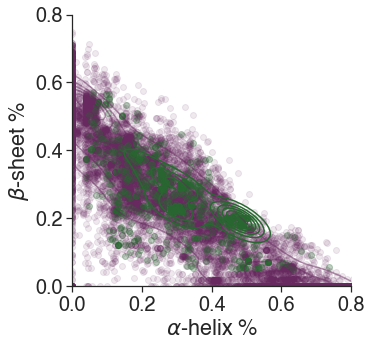

In [147]:
alphafold = pd.read_csv(f"data/unique_secondary_structures_100.csv")
rsbc = pd.read_csv(f"data/structures_100_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'], y=df_pdb['beta'], color=colors[0], alpha=0.1)
plt.scatter(x=df_af['H'][::1], y=df_af['beta'][::1], color=colors[1], alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.5)
contour_cloud(x=df_af['H'], y=df_af['beta'], c= colors[1], alpha=1)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
sns.despine()

<ipython-input-130-0beaf1ae92bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-130-0beaf1ae92bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-131-9aeb3edcf13d>:10: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, f, colors=c, lw=2, alpha=alpha)


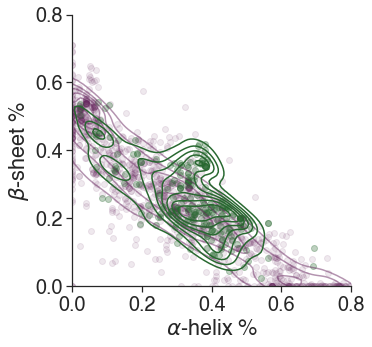

In [144]:
alphafold = pd.read_csv(f"data/unique_secondary_structures_200.csv")
rsbc = pd.read_csv(f"data/structures_200_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'][::20], y=df_pdb['beta'][::20], color=colors[0], alpha=0.1)
plt.scatter(x=df_af['H'][::10], y=df_af['beta'][::10], color=colors[1], alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.5)
contour_cloud(x=df_af['H'], y=df_af['beta'], c= colors[1], alpha=1)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
sns.despine()

<ipython-input-130-0beaf1ae92bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type"] = len(df)*['alpha fold']
<ipython-input-130-0beaf1ae92bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['beta'] = rsbc['B'].fillna(0)+rsbc['E'].fillna(0)
<ipython-input-131-9aeb3edcf13d>:10: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, f, colors=c, lw=2, alpha=alpha)


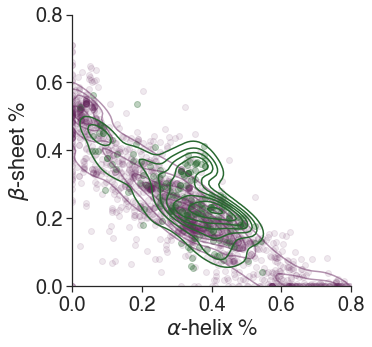

In [145]:
alphafold = pd.read_csv(f"data/unique_secondary_structures_300.csv")
rsbc = pd.read_csv(f"data/structures_300_raw.csv")
df_af, df_pdb, whole = return_df_for_plotting(alphafold, rsbc)
df_pdb = df_pdb.fillna(0)
plt.scatter(x=df_pdb['H'][::20], y=df_pdb['beta'][::20], color=colors[0], alpha=0.1)
plt.scatter(x=df_af['H'][::10], y=df_af['beta'][::10], color=colors[1], alpha=0.3)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((5,5))
contour_cloud(x=df_pdb['H'], y=df_pdb['beta'], c=colors[0], alpha=0.5)
contour_cloud(x=df_af['H'], y=df_af['beta'], c= colors[1], alpha=1)
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.8)
ax.set_xlabel(r"$\alpha$-helix %")
ax.set_ylabel(r"$\beta$-sheet %")
sns.despine()